<a href="https://colab.research.google.com/github/capajaro/DSP_Project/blob/main/Proyecto_Final_DSP_UN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulos Base y Librerias


In [47]:
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.fft as ft
import timeit as tm
import soundfile as sf
from scipy import fft


In [76]:
def FoureirPlots(Signal, fs, Name):
    
  dt = 1/fs
  L = len(Signal)
  Signal_fft = ft.fft(Signal);
  f = np.arange(-fs/2, fs/2-(fs/(len(Signal_fft)))+fs/(len(Signal_fft)), fs/(len(Signal_fft)))
  Signal_f = ft.fftshift(ft.fft(Signal))
  w = ft.fftshift(ft.fftfreq(Signal_f.size,1/2))
  plt.figure(20)
  plt.plot(w,np.abs(Signal_f))
  plt.rcParams["font.family"] = "Times New Roman"
  plt.grid(b=True, which='minor', alpha=0.25)
  plt.xlabel('Frecuencia Discreta', fontdict = {'fontsize': 12, 'fontname': 'serif'})
  xt_Label = ['%s\u03C0' %(el) for el in np.arange(-1,1.25,0.25).tolist()]
  plt.xticks(np.arange(-1,1.25,0.25).tolist(), labels = xt_Label)
  titulo = 'FFT for: %s WAV' % (Name)
  plt.title(titulo, fontdict = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'serif'})
  plt.savefig('%s.png'%(Name))


In [84]:
# Se utilizara un filtro FIR FFT para la implementación de los filtros
def FIR_FFT(x,H):
    y = np.real(ft.ifft(ft.fft(x,len(H))*H))
    return y;


In [85]:
def Tramas(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [149]:
def diezmador(Signal, orden):
  Signal = np.array(Signal)
  pos = [orden*i for i in range(int(np.floor(len(Signal)/orden)))]
  Signal_D = Signal[pos]
  return Signal_D 

In [184]:
def interpolador(Signal, orden):
  Signal = np.array(Signal)
  Signal_I = np.zeros((Signal.size*orden))
  pos = [orden*i for i in range(len(Signal)) ]
  Signal_I[pos] = Signal

  return Signal_I 

In [150]:

#filtro paso bajo LP 

def Filtro_LP(Signal):
  Signal = np.array(Signal)
  M = 256 #Input buffer
  New_Len = int(np.ceil(Signal.size/M))
  Temp =  np.zeros((New_Len*M,))
  Temp[0:Signal.size] = Signal
  Signal = Temp
  Filtro_LP = np.loadtxt('https://raw.githubusercontent.com/capajaro/DSP_Project/main/Filtro_LP_Banda_0475_0525.csv', delimiter = ',')
  N_LP = len(Filtro_LP) #Filter order
  L_LP = N_LP + M #FFT size
  buff_OLA_LP = np.zeros((N_LP,)) #Buffer for FIR_FFT
  filt_f_LP = ft.fft(Filtro_LP,L_LP)

  # Aplicación filtro FIR FFT LP
  y_fir_fft_LP = np.zeros(Signal.size) # este es el outpur
  for i in np.arange(0,len(Signal),M):
      buf = FIR_FFT(Signal[i:i+M],filt_f_LP)
      y_fir_fft_LP[i:i+M] = buf[0:M]
      y_fir_fft_LP[i:i+N_LP] = y_fir_fft_LP[i:i+N_LP] + buff_OLA_LP
      buff_OLA_LP = buf[M:]
  y_fir_fft_LP_f = ft.fftshift(ft.fft(y_fir_fft_LP))
  w_LP = ft.fftshift(ft.fftfreq(y_fir_fft_LP_f.size,1/2))

  return w_LP, y_fir_fft_LP, y_fir_fft_LP_f



def Filtro_HP(Signal):
  Signal = np.array(Signal)
  M = 256 #Input buffer
  New_Len = int(np.ceil(Signal.size/M))
  Temp =  np.zeros((New_Len*M,))
  Temp[0:Signal.size] = Signal
  Signal = Temp
  Filtro_HP = np.loadtxt('https://raw.githubusercontent.com/capajaro/DSP_Project/main/Filtro_HP_Banda_0475_0525.csv', delimiter = ',')
  N_HP = len(Filtro_HP) #Filter order
  L_HP = N_HP + M #FFT size
  buff_OLA_HP = np.zeros((N_HP,)) #Buffer for FIR_FFT
  filt_f_HP = ft.fft(Filtro_HP,L_HP)


  #Aplicación filtro FIR FFT HP
  y_fir_fft_HP = np.zeros(Signal.size)
  for i in np.arange(0,len(Signal),M):
      buf = FIR_FFT(Signal[i:i+M],filt_f_HP)
      y_fir_fft_HP[i:i+M] = buf[0:M]
      y_fir_fft_HP[i:i+N_HP] = y_fir_fft_HP[i:i+N_HP] + buff_OLA_HP
      buff_OLA_HP = buf[M:]
  #Approx. filtering time
  y_fir_fft_HP_f = ft.fftshift(ft.fft(y_fir_fft_HP))
  w_HP = ft.fftshift(ft.fftfreq(y_fir_fft_HP_f.size,1/2))
  return w_HP, y_fir_fft_HP, y_fir_fft_HP_f


# Análisis Exploratorio de Las Señales

In [48]:
Metallica_Data, samplerate_Metallica  = sf.read('/content/Metallica.wav')
Mozart_Data, samplerate_Mozart  = sf.read('/content/Mozart.wav')
Nirvana_Data, samplerate_Nirvana  = sf.read('/content/Nirvana.wav')

length Metallica= 15.0s
Sample rate Metallica: 32000
Channels: 2
Subtype: PCM_16


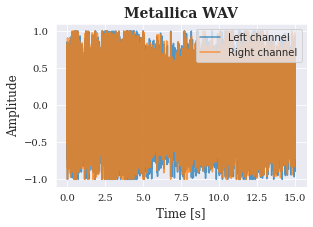

In [49]:
Metallica_sf = sf.SoundFile('/content/Metallica.wav')
length = Metallica_Data.shape[0] / samplerate_Metallica
print(f"length Metallica= {length}s")

print('Sample rate Metallica: {}'.format(Metallica_sf.samplerate))
print('Channels: {}'.format(Metallica_sf.channels))
print('Subtype: {}'.format(Metallica_sf.subtype))

time = np.linspace(0., length, Metallica_Data.shape[0])
sns.set_style('darkgrid')
fig = plt.figure(figsize=(4.5,3))
plt.plot(time, Metallica_Data[:, 0], label="Left channel", alpha = 0.75)
plt.plot(time, Metallica_Data[:, 1], label="Right channel", alpha = 0.75)
plt.legend(loc='upper right')
plt.xlabel("Time [s]", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.ylabel("Amplitude", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.title("Metallica WAV", fontdict = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'serif'})
plt.xticks(fontsize = 10, fontname = 'serif')
plt.yticks(fontsize = 10, fontname = 'serif')
plt.show()


number of channels Mozart= 2
length Mozart= 25.0s
Sample rate Mozart: 44100
Channels: 2
Subtype: PCM_16


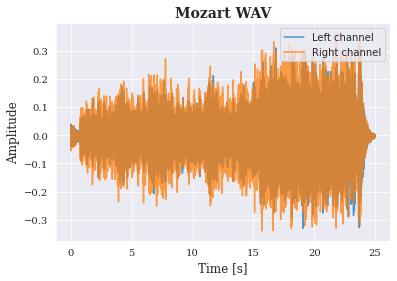

In [50]:
print(f"number of channels Mozart= {Mozart_Data.shape[1]}")
Mozart_sf = sf.SoundFile('/content/Mozart.wav')
length = Mozart_Data.shape[0] / samplerate_Mozart
print(f"length Mozart= {length}s")

print('Sample rate Mozart: {}'.format(Mozart_sf.samplerate))
print('Channels: {}'.format(Mozart_sf.channels))
print('Subtype: {}'.format(Mozart_sf.subtype))

time = np.linspace(0., length, Mozart_Data.shape[0])
plt.plot(time, Mozart_Data[:, 0], label="Left channel", alpha = 0.75)
plt.plot(time, Mozart_Data[:, 1], label="Right channel", alpha = 0.75)
plt.legend(loc='upper right')
plt.xlabel("Time [s]", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.ylabel("Amplitude", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.title("Mozart WAV", fontdict = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'serif'})
plt.xticks(fontsize = 10, fontname = 'serif')
plt.yticks(fontsize = 10, fontname = 'serif')
plt.show()


number of channels Nirvana= 2
length Nirvana= 10.0s
Sample rate Mozart: 32000
Channels: 2
Subtype: PCM_16


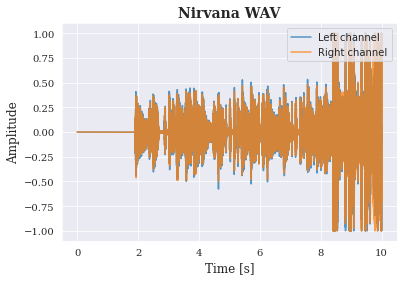

In [51]:
print(f"number of channels Nirvana= {Nirvana_Data.shape[1]}")
Nirvana_sf = sf.SoundFile('/content/Nirvana.wav')
length = Nirvana_Data.shape[0] / samplerate_Nirvana
print(f"length Nirvana= {length}s")

print('Sample rate Mozart: {}'.format(Nirvana_sf.samplerate))
print('Channels: {}'.format(Nirvana_sf.channels))
print('Subtype: {}'.format(Nirvana_sf.subtype))

time = np.linspace(0., length, Nirvana_Data.shape[0])
plt.plot(time, Nirvana_Data[:, 0], label="Left channel", alpha = 0.75)
plt.plot(time, Nirvana_Data[:, 1], label="Right channel", alpha = 0.75)
plt.legend(loc='upper right')
plt.xlabel("Time [s]", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.ylabel("Amplitude", fontdict = {'fontsize': 12, 'fontname': 'serif'})
plt.title("Nirvana WAV", fontdict = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'serif'})
plt.xticks(fontsize = 10, fontname = 'serif')
plt.yticks(fontsize = 10, fontname = 'serif')
plt.show()


## Se Selecciona el Canal a utilizar para todos los WAVS

In [52]:
Canal_Name = 'Derecho'
#Canal_Name = 'Izquierdo'

In [53]:
# Se selecciona el canal a utilizar
Canal = 1 if Canal_Name == 'Derecho' else 0
Metallica = Metallica_Data[:, Canal].tolist()
Nirvana = Nirvana_Data[:, Canal].tolist()
Mozart = Mozart_Data[:, Canal].tolist()

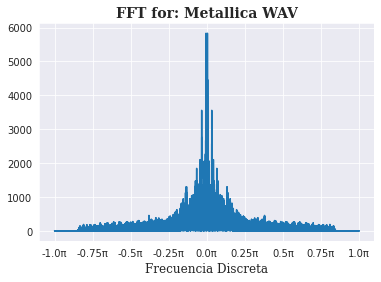

In [77]:
FoureirPlots(Metallica, samplerate_Metallica, 'Metallica')

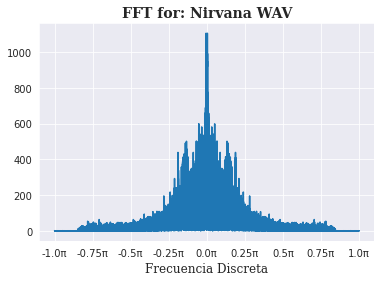

In [78]:
FoureirPlots(Nirvana, samplerate_Nirvana, 'Nirvana')

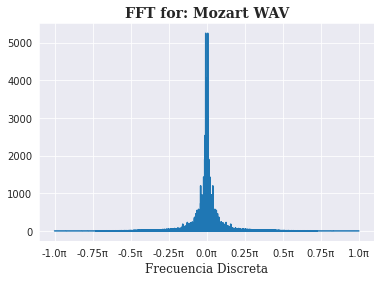

In [79]:
FoureirPlots(Mozart, samplerate_Mozart, 'Mozart')

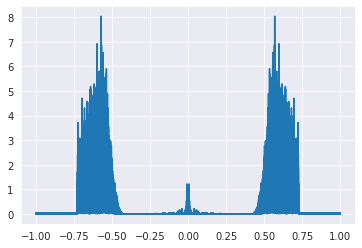

In [152]:
[w_mozart_filt_HP, Mozart_filt_HP, Mozart_filt_HP_f] = Filtro_HP(Mozart)
plt.plot(w_mozart_filt_HP, np.abs(Mozart_filt_HP_f))

In [178]:
tic = tm.default_timer()
Signal = Mozart
orden = 10
Signal = np.array(Signal)
Signal_I = np.zeros((Signal.size*orden))
for i in range(len(Signal)):
  Signal_I[orden*i] = Signal[i]
toc = tm.default_timer() 

print(toc-tic)

0.44170739499895717


In [179]:
tic = tm.default_timer()
Signal = Mozart
orden = 10
Signal = np.array(Signal)
Signal_I = np.zeros((Signal.size*orden))
pos = [orden*i for i in range(len(Signal)) ]
Signal_I[pos] = Signal
toc = tm.default_timer() 

print(toc-tic)

0.2588066759999492


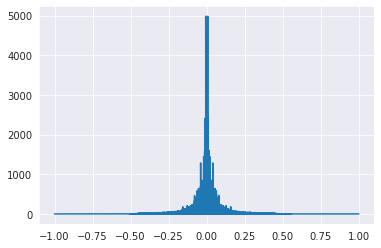

In [136]:
[w_mozart_filt_LP, Mozart_filt_LP, Mozart_filt_LP_f] = Filtro_LP(Mozart)
plt.plot(w_mozart_filt_LP, np.abs(Mozart_filt_LP_f))

In [103]:
from math import gcd  
x=300  
y=33880  
print("El máximo común divisor entre {}, {} y {} es: ".format(len(Mozart),len(Metallica), len(Nirvana)))  
print(gcd(x,y)) 

El máximo común divisor entre 1102500, 480000 y 320000 es: 
20


## AYUDAS Código 

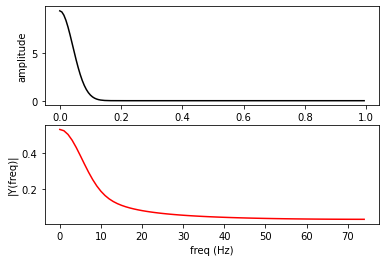

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from numpy import log, pi, e

# Signal setup
Fs = 150
Ts = 1.0 / Fs
t = np.arange(0, 1, Ts)
ff = 50
fwhl = 0.1
y = (2 / fwhl) * (log([2]) / pi)**0.5 * e**(-(4 * log([2]) * t**2) / fwhl**2)

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(t, y, 'k-')
plt.xlabel('time')
plt.ylabel('amplitude')

# Normalized FFT
plt.subplot(2, 1, 2)
n = len(y)
k = np.arange(n)
T = n / Fs
frq = k / T
freq = frq[range(int(round(n / 2)))]

Y = np.fft.fft(y) / n
Y = Y[range(int(round(n / 2)))]

plt.plot(freq, abs(Y), 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')

plt.show()

0.0022351580000758986
0.12366108100013662
0.08981836699967971
8.878746262513948e-13
1.0667662691542617e-12
1.3104726710556764e-12


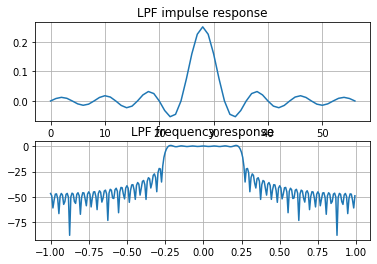

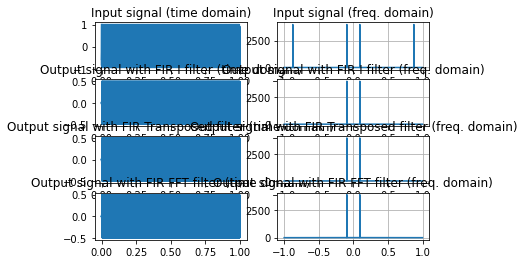

In [ ]:

#%%
N = 56 #Filter order
wc = 0.25 #Cutoff frequency
M = 200 #Input buffer
L = N + M #FFT size

buff_FIR_I = np.zeros((N,)) #Buffer for FIR_I
buff_FIR_T = np.zeros((N,)) #Buffer for FIR_Transposed
buff_OLA = np.zeros((N,)) #Buffer for FIR_FFT

#%%
def IdealLPF(wc,L):
    n = np.arange(0,L+1)
    h = wc*np.sinc(wc*(n-(L/2)))
    return h;

#%%
def FIR_FFT(x,H):
    y = np.real(ft.ifft(ft.fft(x,len(H))*H))
    return y;

#%%
def FIR_I(x,h):
    y = x*h[0] + np.sum(buff_FIR_I*h[1:])
    buff_FIR_I[1:] = buff_FIR_I[0:N-1]
    buff_FIR_I[0] = x
    return y;
   
#%%     
def FIR_T(x,h):
    temp = x*h
    y = temp[0]+buff_FIR_T[N-1];
    buff_FIR_T[1:] = buff_FIR_T[0:N-1]+temp[N-1:0:-1]
    buff_FIR_T[0] = temp[N]
    return y; 

#%%    
#Get an impulse response for testing
filt = IdealLPF(wc,N)
filt_f = ft.fft(filt,L)
w = ft.fftshift(ft.fftfreq(filt_f.size,1/2))
plt.figure()
plt.subplot(2,1,1)
plt.plot(filt)
plt.title('LPF impulse response')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(w,20*np.log10(np.abs(ft.fftshift(filt_f))))
plt.title('LPF frequency response')
plt.grid(True)

#%%
#Create a test signal
f1 = 750
f2 = 7000
fs = 16000
t = np.arange(0,16000)*(1/fs);
test = 0.5*np.cos(2*np.pi*f1*t) + 0.5*np.cos(2*np.pi*f2*t)
test_f = ft.fftshift(ft.fft(test))
w = ft.fftshift(ft.fftfreq(test_f.size,1/2))

#%%
#FIR FFT filtering
y_fir_fft = np.zeros(test.size)
tic = tm.default_timer()
for i in np.arange(0,len(test),M):
    buf = FIR_FFT(test[i:i+M],filt_f)
    y_fir_fft[i:i+M] = buf[0:M]
    y_fir_fft[i:i+N] = y_fir_fft[i:i+N] + buff_OLA
    buff_OLA = buf[M:]
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_fft_f = ft.fftshift(ft.fft(y_fir_fft))

#%%
#FIR I filtering
y_fir_i = np.zeros(test.size)
tic = tm.default_timer()
for i in range(len(test)):
    y_fir_i[i] = FIR_I(test[i],filt)
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_i_f = ft.fftshift(ft.fft(y_fir_i))

#%%
#FIR transposed filtering
y_fir_t = np.zeros(test.size)
tic = tm.default_timer()
for i in range(len(test)):
    y_fir_t[i] = FIR_T(test[i],filt)
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_t_f = ft.fftshift(ft.fft(y_fir_t))

#%%
#Time and frequency plots
plt.figure()
plt.subplot(4,2,1)
plt.plot(t,test)
plt.title('Input signal (time domain)')
plt.subplot(4,2,3)
plt.plot(t,y_fir_i)
plt.title('Output signal with FIR I filter (time domain)')
plt.subplot(4,2,5)
plt.plot(t,y_fir_t)
plt.title('Output signal with FIR Transposed filter (time domain)')
plt.subplot(4,2,7)
plt.plot(t,y_fir_fft)
plt.title('Output signal with FIR FFT filter (time domain)')
plt.subplot(4,2,2)
plt.plot(w,np.abs(test_f))
plt.title('Input signal (freq. domain)')
plt.grid(True)
plt.subplot(4,2,4)
plt.plot(w,np.abs(y_fir_i_f))
plt.title('Output signal with FIR I filter (freq. domain)')
plt.grid(True)
plt.subplot(4,2,6)
plt.plot(w,np.abs(y_fir_t_f))
plt.title('Output signal with FIR Transposed filter (freq. domain)')
plt.grid(True)
plt.subplot(4,2,8)
plt.plot(w,np.abs(y_fir_fft_f))
plt.title('Output signal with FIR FFT filter (freq. domain)')
plt.grid(True)

#%%
print(sum(abs(y_fir_i-y_fir_t)))
print(sum(abs(y_fir_i-y_fir_fft)))
print(sum(abs(y_fir_t-y_fir_fft)))